In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py 
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [99]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

Task : Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [100]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Task : Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

1. For the "Median value of owner-occupied homes" provide a boxplot

2. Provide a  histogram for the Charles river variable

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

5. Create a histogram for the pupil to teacher ratio variable



In [101]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [102]:
boston_df.shape

(506, 14)

In [103]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


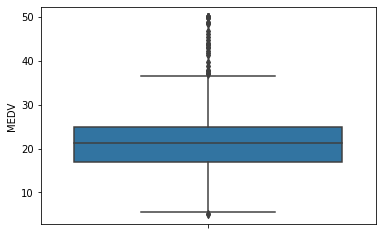

In [104]:
# 1. For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot( y="MEDV", data=boston_df)

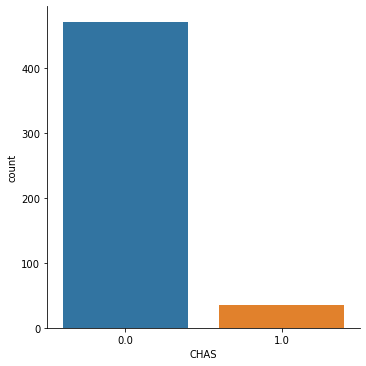

In [105]:
# 2. Provide a  histogram for the Charles river variable
sns.catplot(x='CHAS', kind='count', data=boston_df)

In [106]:
# 3. Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'Age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_group'] = '70 years and older'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


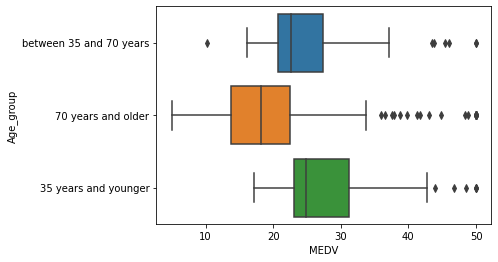

In [107]:
ax = sns.boxplot(x="MEDV", y="Age_group", data=boston_df)

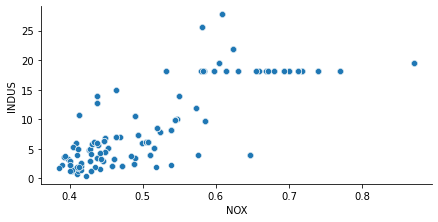

In [108]:
# 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and
#  the proportion of non-retail business acres per town. What can you say about the relationship?
sns.relplot(x="NOX", y="INDUS",
            data=boston_df, height = 3, aspect = 2)

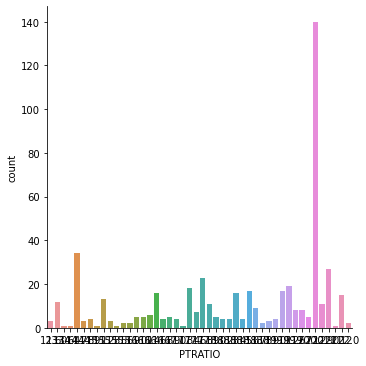

In [109]:
# 5. Create a histogram for the pupil to teacher ratio variable
sns.catplot(x='PTRATIO', kind='count', data=boston_df)

Task : Use the appropriate tests to answer the questions provided.
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

# Q1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

''' We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

        *   One independent, categorical variable with two levels or group
        *   One dependent continuous variable
        *   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
        *   The dependent variable must follow a normal distribution
        *   Assumption of homogeneity of variance
'''

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river or not")


Ploting the dependent variable(MEDV) with a historgram


C:\Users\dkashyap\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

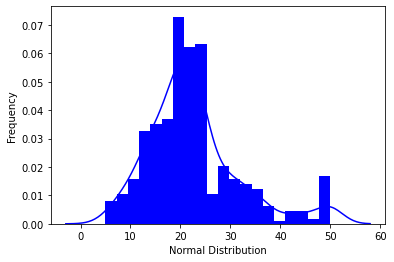

In [110]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

 Performing the Levene's Test to check for the test significance

In [111]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
# for p-value greater than 0.05 we can assume equality of variance

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [112]:
boston_df[boston_df['CHAS']==1].head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_group
142,142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,26.82,13.4,70 years and older
152,152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,12.12,15.3,70 years and older
154,154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,15.12,17.0,70 years and older
155,155,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,15.02,15.6,70 years and older
160,160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,5.50,27.0,70 years and older


Using the <code>ttest_ind</code> from the <code>scipy_stats</code> library


In [113]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, 
we reject the null hypothesis as there is enough proof that there is significant difference in median value of houses bounded by the Charles river or not (T-test for independent samples)


# Q2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)



First we'll discretize the age variable into three groups under Age_group variable as the one-way ANOVA can't work with continuous variable :
* 35 years and younger
* between 35 and 70 years 
* 70 years and older


State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


Test for equality of variance

In [114]:
scipy.stats.levene(boston_df[boston_df['Age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['Age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['Age_group'] == '70 years and older']['MEDV'], 
                   center='mean')


LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [115]:
thirtyfive_lower_medv = boston_df[boston_df['Age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_medv = boston_df[boston_df['Age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older_medv = boston_df[boston_df['Age_group'] == '70 years and older']['MEDV']

In [116]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_medv, thirtyfive_seventy_medv, seventy_older_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant
 evidence that at least one of the means differ.


# Q3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


State the hypothesis:

*   $H\_0:$ NOX is not correlated with INDUS
*   $H\_1:$ NOX is correlated with INDUS


In [117]:
boston_df['INDUS']

0       2.31
1       7.07
2       7.07
3       2.18
4       2.18
       ...  
501    11.93
502    11.93
503    11.93
504    11.93
505    11.93
Name: INDUS, Length: 506, dtype: float64

In [118]:
boston_df['NOX']

0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: NOX, Length: 506, dtype: float64

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot


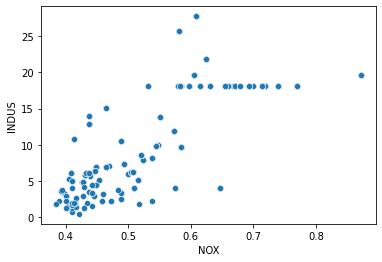

In [119]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [120]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


# Q4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [121]:
boston_df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [122]:
boston_df['DIS']

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: DIS, Length: 506, dtype: float64

State the hypothesis:

*   $H\_0:$ DIS is not correlated with MEDV
*   $H\_1:$ DIS is correlated with MEDV


In [123]:
# X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           1.21e-08
Time:                        20:44:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between an additional weighted distance to the five Boston employment centres & median value of owner occupied homes.